# Final Project Submission

Please fill out:
* Student name: Peder Norr
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:


## TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>

<font size=3rem>
    
- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
</font>
___

# INTRODUCTION

This proposal contains an analysis of house sales data in King County in order to provide King County home owners with necessary information as they prepare to renovate and sell their homes. Specifically, it provides actionable insights with respect to what kind of home renovations the home owners might make with the goal of maximizing the sale price of their home. Initial analysis of home sale price and other housing data shows that home sale prices are most positively related to the renovation status (ie if the home was renovated at all), grade, and condition of the home. Home owners can use this analysis to choose which renovations to make as they seek to achieve the highest sale price possible for their home.



## Business Problem

As the housing market in their area continues to run hot, there are many King County residents that have decided to sell their homes and want to renovate their home to increase its resale value. However, the home owners don't know what factors are important for determining a home's value and require information to inform them on what renovations to make. Using home sale price and other housing data from King County, I identify which potential renovations would best maximize home sale price.


# OBTAIN

## Data Understanding

This analysis leverages the [King County House Sales Dataset](https://www.kaggle.com/harlfoxem/housesalesprediction) which contains data on home sales from King County, Washington from the years 2014-2015. The data represents a multitude of home characteristics including square footage, number of floors, number of bedrooms, home grade and condition, and various other variables. The target variable of the analysis is home price. My final cleaned dataset consisted of 20180 homes sold from the years 2014-2015.

In [1]:
# Import necessary packages

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.regression.linear_model import OLS

from scipy import stats

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
# Set options for pandas and seaborn

pd.set_option('display.float_format', lambda x: f"{x:,}")
pd.set_option('display.max_columns',0)
plt.style.use('seaborn-notebook')
pd.set_option('display.max_columns',0)

In [3]:
# Import data file

housing_data= pd.read_csv('data/kc_house_data.csv')
housing_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,"221,900.0",3,1.0,1180,5650,1.0,nan,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,"538,000.0",3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,"1,991.0",98125,47.721000000000004,-122.319,1690,7639
2,5631500400,2/25/2015,"180,000.0",2,1.0,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,nan,98028,47.7379,-122.23299999999999,2720,8062
3,2487200875,12/9/2014,"604,000.0",4,3.0,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.39299999999999,1360,5000
4,1954400510,2/18/2015,"510,000.0",3,2.0,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,"360,000.0",3,2.5,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,"400,000.0",4,2.5,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.36200000000001,1830,7200
21594,1523300141,6/23/2014,"402,101.0",2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.29899999999999,1020,2007
21595,291310100,1/16/2015,"400,000.0",3,2.5,1600,2388,2.0,nan,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
# Display dataframe information

housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
housing_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,"21,597.0","21,597.0","21,597.0","21,597.0","21,597.0","21,597.0","21,597.0","19,221.0","21,534.0","21,597.0","21,597.0","21,597.0","21,597.0","17,755.0","21,597.0","21,597.0","21,597.0","21,597.0","21,597.0"
mean,"4,580,474,287.770987","540,296.5735055795",3.3731999814789093,2.1158262721674306,"2,080.3218502569803","15,099.408760475992",1.4940964022780943,0.007595858696217679,0.23386272870808952,3.4098254387183404,7.657915451220076,"1,788.5968421540028","1,970.9996758809093",83.6367783722895,"98,077.95184516368",47.56009299439737,-122.2139824975691,"1,986.6203176367087","12,758.283511598833"
std,"2,876,735,715.74778","367,368.1401013945",0.9262988945421479,0.7689842966527209,918.1061250800805,"41,412.636875502074",0.5396827909775457,0.08682484570054606,0.7656862011746727,0.6505456356725546,1.1731996637760254,827.7597611646754,29.375234132441644,399.9464138788162,53.51307235352816,0.13855176817307177,0.14072352882947373,685.2304719001586,"27,274.441950386343"
min,"1,000,102.0","78,000.0",1.0,0.5,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,"1,900.0",0.0,"98,001.0",47.1559,-122.51899999999999,399.0,651.0
25%,"2,123,049,175.0","322,000.0",3.0,1.75,"1,430.0","5,040.0",1.0,0.0,0.0,3.0,7.0,"1,190.0","1,951.0",0.0,"98,033.0",47.4711,-122.32799999999999,"1,490.0","5,100.0"
50%,"3,904,930,410.0","450,000.0",3.0,2.25,"1,910.0","7,618.0",1.5,0.0,0.0,3.0,7.0,"1,560.0","1,975.0",0.0,"98,065.0",47.5718,-122.23100000000001,"1,840.0","7,620.0"
75%,"7,308,900,490.0","645,000.0",4.0,2.5,"2,550.0","10,685.0",2.0,0.0,0.0,4.0,8.0,"2,210.0","1,997.0",0.0,"98,118.0",47.678000000000004,-122.125,"2,360.0","10,083.0"
max,"9,900,000,190.0","7,700,000.0",33.0,8.0,"13,540.0","1,651,359.0",3.5,1.0,4.0,5.0,13.0,"9,410.0","2,015.0","2,015.0","98,199.0",47.7776,-121.315,"6,210.0","871,200.0"


# SCRUB

## Data Preparation

After obtaining my dataset, I cleaned the data by addressing null values, standardizing data types, removing duplicate values, removing unnecessary columns, and creating a `was_renovated` categorical variable. Specifically, I dropped the `lat` and `long` variables and I did not find them relevant to the analysis, and I filled in the null values for `view`, `waterfront`, and `sqft_basement` with the mode value for those columns.

In [6]:
housing_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,"221,900.0",3,1.0,1180,5650,1.0,nan,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,"538,000.0",3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,"1,991.0",98125,47.721000000000004,-122.319,1690,7639
2,5631500400,2/25/2015,"180,000.0",2,1.0,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,nan,98028,47.7379,-122.23299999999999,2720,8062
3,2487200875,12/9/2014,"604,000.0",4,3.0,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.39299999999999,1360,5000
4,1954400510,2/18/2015,"510,000.0",3,2.0,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [7]:
#Drop duplicates, if any
housing_data.drop_duplicates(inplace=True)

#No duplicates
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Feature Engineering

In [8]:
# Transform the 'yr_renovated' column into a boolean 'was_renovated' feature
# to better capture the effects of renovation on price

housing_data['yr_renovated'].fillna(0, inplace=True)
(housing_data['yr_renovated'] > 0).astype(int)
housing_data['was_renovated'] = (housing_data['yr_renovated'] > 0).astype(int)
housing_data['was_renovated'].value_counts()

0    20853
1      744
Name: was_renovated, dtype: int64

In [9]:
housing_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated
0,7129300520,10/13/2014,"221,900.0",3,1.0,1180,5650,1.0,nan,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,"538,000.0",3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,"1,991.0",98125,47.721000000000004,-122.319,1690,7639,1
2,5631500400,2/25/2015,"180,000.0",2,1.0,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.23299999999999,2720,8062,0
3,2487200875,12/9/2014,"604,000.0",4,3.0,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.39299999999999,1360,5000,0
4,1954400510,2/18/2015,"510,000.0",3,2.0,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


### Continued scrubbing

In [10]:
#Drop any unnecessary columns

housing_data.drop(['id', 'date', 'yr_renovated', 'lat', 'long'], axis = 1, inplace = True)
housing_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,was_renovated
0,"221,900.0",3,1.0,1180,5650,1.0,nan,0.0,3,7,1180,0.0,1955,98178,1340,5650,0
1,"538,000.0",3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,1690,7639,1
2,"180,000.0",2,1.0,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,2720,8062,0
3,"604,000.0",4,3.0,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,1360,5000,0
4,"510,000.0",3,2.0,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,1800,7503,0


In [11]:
#Check for null or missing values

housing_data.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
sqft_living15       0
sqft_lot15          0
was_renovated       0
dtype: int64

In [12]:
# Determine most common value for 'view' and 'waterfront' features

display(housing_data['view'].value_counts())
housing_data['waterfront'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [13]:
# Fill in missing values for 'view' and 'waterfront' with the most common value

housing_data['view'].fillna(0, inplace=True)
housing_data['waterfront'].fillna(0, inplace=True)
housing_data.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
sqft_living15    0
sqft_lot15       0
was_renovated    0
dtype: int64

In [14]:
# Recast datatypes

housing_data.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
zipcode            int64
sqft_living15      int64
sqft_lot15         int64
was_renovated      int32
dtype: object

In [15]:
housing_data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2810.0        1
475.0         1
792.0         1
176.0         1
1770.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [16]:
# Fill in null values for 'sqft_basement with zeroes as its possible that
# those homes did not have basements.'

housing_data['sqft_basement'].replace('?', 0.0, inplace=True)

In [17]:
housing_data['sqft_basement'].astype(str)
housing_data['sqft_basement'].dtypes

dtype('O')

In [18]:
housing_data['sqft_basement'].value_counts()

0.0       12826
0.0         454
600.0       217
500.0       209
700.0       208
          ...  
2360.0        1
2600.0        1
276.0         1
2720.0        1
65.0          1
Name: sqft_basement, Length: 304, dtype: int64

In [19]:
housing_data['sqft_basement'] = housing_data['sqft_basement'].astype(float)

In [20]:
# Recast 'sqft_basement' data type to int

housing_data['sqft_basement'] = housing_data['sqft_basement'].astype(int)
housing_data['sqft_basement'].value_counts()

0       13280
600       217
500       209
700       208
800       201
        ...  
1816        1
1880        1
1960        1
2120        1
1135        1
Name: sqft_basement, Length: 303, dtype: int64

In [21]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  float64
 7   view           21597 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int32  
 12  yr_built       21597 non-null  int64  
 13  zipcode        21597 non-null  int64  
 14  sqft_living15  21597 non-null  int64  
 15  sqft_lot15     21597 non-null  int64  
 16  was_renovated  21597 non-null  int32  
dtypes: float64(5), int32(2), int64(10)
memory usage: 2

In [22]:
# Display dataframe information

display(housing_data.head())
display(housing_data.info())
housing_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,was_renovated
0,"221,900.0",3,1.0,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,98178,1340,5650,0
1,"538,000.0",3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,98125,1690,7639,1
2,"180,000.0",2,1.0,770,10000,1.0,0.0,0.0,3,6,770,0,1933,98028,2720,8062,0
3,"604,000.0",4,3.0,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,98136,1360,5000,0
4,"510,000.0",3,2.0,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,98074,1800,7503,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  float64
 7   view           21597 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int32  
 12  yr_built       21597 non-null  int64  
 13  zipcode        21597 non-null  int64  
 14  sqft_living15  21597 non-null  int64  
 15  sqft_lot15     21597 non-null  int64  
 16  was_renovated  21597 non-null  int32  
dtypes: float64(5), int32(2), int64(10)
memory usage: 2

None

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,was_renovated
count,"21,597.0","21,597.0","21,597.0","21,597.0","21,597.0","21,597.0","21,597.0","21,597.0","21,597.0","21,597.0","21,597.0","21,597.0","21,597.0","21,597.0","21,597.0","21,597.0","21,597.0"
mean,"540,296.5735055795",3.3731999814789093,2.1158262721674306,"2,080.3218502569803","15,099.408760475992",1.4940964022780943,0.006760198175672547,0.23318053433347224,3.4098254387183404,7.657915451220076,"1,788.5968421540028",285.7165810066213,"1,970.9996758809093","98,077.95184516368","1,986.6203176367087","12,758.283511598833",0.03444922905959161
std,"367,368.1401013945",0.9262988945421479,0.7689842966527209,918.1061250800805,"41,412.636875502074",0.5396827909775457,0.08194393699511227,0.7646725795843418,0.6505456356725546,1.1731996637760254,827.7597611646754,439.8198295957846,29.375234132441644,53.51307235352816,685.2304719001586,"27,274.441950386343",0.18238426437505795
min,"78,000.0",1.0,0.5,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,0.0,"1,900.0","98,001.0",399.0,651.0,0.0
25%,"322,000.0",3.0,1.75,"1,430.0","5,040.0",1.0,0.0,0.0,3.0,7.0,"1,190.0",0.0,"1,951.0","98,033.0","1,490.0","5,100.0",0.0
50%,"450,000.0",3.0,2.25,"1,910.0","7,618.0",1.5,0.0,0.0,3.0,7.0,"1,560.0",0.0,"1,975.0","98,065.0","1,840.0","7,620.0",0.0
75%,"645,000.0",4.0,2.5,"2,550.0","10,685.0",2.0,0.0,0.0,4.0,8.0,"2,210.0",550.0,"1,997.0","98,118.0","2,360.0","10,083.0",0.0
max,"7,700,000.0",33.0,8.0,"13,540.0","1,651,359.0",3.5,1.0,4.0,5.0,13.0,"9,410.0","4,820.0","2,015.0","98,199.0","6,210.0","871,200.0",1.0


In [23]:
# Export cleaned data set

housing_data.to_csv('data/housing_data_cleaned.csv')

# EDA

### Linearity Assumption

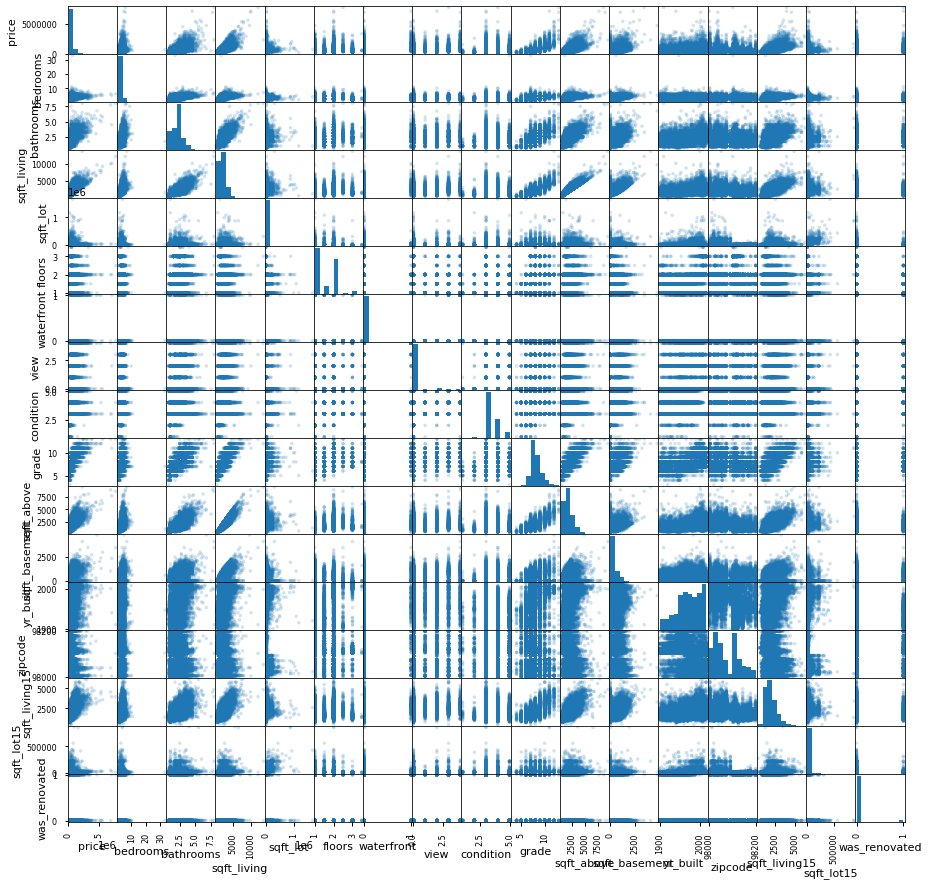

In [24]:
# Check for linearity between predictors and price

pd.plotting.scatter_matrix(housing_data, alpha=0.2, figsize=(15, 15))
plt.show()

Based on the top row of the scatter plot matrix above, I determined that all variables generally met the linearity assumption, or were categorical variables.

### Check for Mulitcollinearity

In [25]:
# Check for mulitcollinearity using correlation heatmap

correlations = housing_data.drop('price', axis=1).corr()
correlations.round(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,was_renovated
bedrooms,1.0,0.51,0.58,0.03,0.18,-0.0,0.08,0.03,0.36,0.48,0.3,0.16,-0.15,0.39,0.03,0.02
bathrooms,0.51,1.0,0.76,0.09,0.5,0.06,0.19,-0.13,0.67,0.69,0.28,0.51,-0.2,0.57,0.09,0.05
sqft_living,0.58,0.76,1.0,0.17,0.35,0.1,0.28,-0.06,0.76,0.88,0.43,0.32,-0.2,0.76,0.18,0.05
sqft_lot,0.03,0.09,0.17,1.0,-0.0,0.02,0.08,-0.01,0.11,0.18,0.02,0.05,-0.13,0.14,0.72,0.01
floors,0.18,0.5,0.35,-0.0,1.0,0.02,0.03,-0.26,0.46,0.52,-0.24,0.49,-0.06,0.28,-0.01,0.0
waterfront,-0.0,0.06,0.1,0.02,0.02,1.0,0.38,0.02,0.08,0.07,0.08,-0.02,0.03,0.08,0.03,0.07
view,0.08,0.19,0.28,0.08,0.03,0.38,1.0,0.05,0.25,0.17,0.27,-0.05,0.09,0.28,0.07,0.09
condition,0.03,-0.13,-0.06,-0.01,-0.26,0.02,0.05,1.0,-0.15,-0.16,0.17,-0.36,0.0,-0.09,-0.0,-0.06
grade,0.36,0.67,0.76,0.11,0.46,0.08,0.25,-0.15,1.0,0.76,0.17,0.45,-0.19,0.71,0.12,0.02
sqft_above,0.48,0.69,0.88,0.18,0.52,0.07,0.17,-0.16,0.76,1.0,-0.05,0.42,-0.26,0.73,0.2,0.02


<AxesSubplot:>

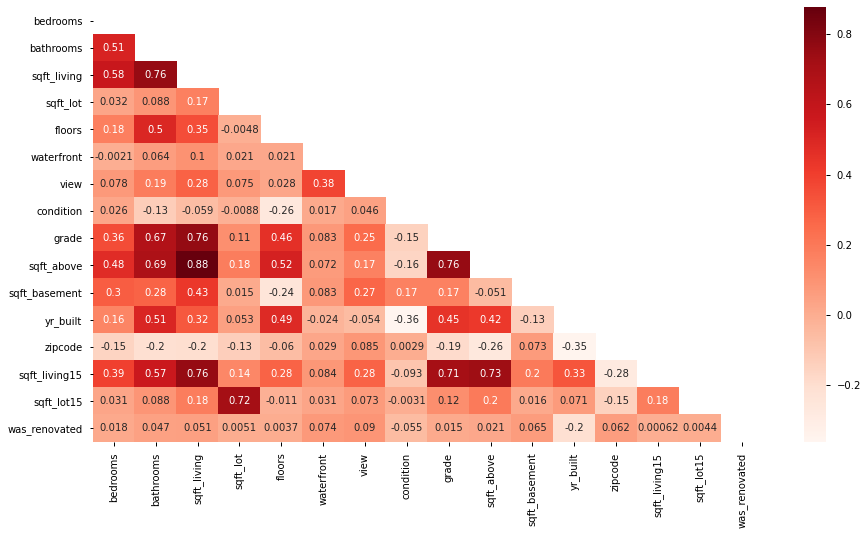

In [26]:
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,8))
sns.heatmap(correlations, annot=True, cmap='Reds', mask=mask, ax=ax)

In [27]:
# Drop mulitcollinear features, using 0.76 as the threshold 

housing_data_model = housing_data.drop('sqft_above', axis=1)
housing_data_model.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,was_renovated
0,"221,900.0",3,1.0,1180,5650,1.0,0.0,0.0,3,7,0,1955,98178,1340,5650,0
1,"538,000.0",3,2.25,2570,7242,2.0,0.0,0.0,3,7,400,1951,98125,1690,7639,1
2,"180,000.0",2,1.0,770,10000,1.0,0.0,0.0,3,6,0,1933,98028,2720,8062,0
3,"604,000.0",4,3.0,1960,5000,1.0,0.0,0.0,5,7,910,1965,98136,1360,5000,0
4,"510,000.0",3,2.0,1680,8080,1.0,0.0,0.0,3,8,0,1987,98074,1800,7503,0


After removing `sqft_above`, which logically correlated highly with `sqft_living`, I determined that the rest of the features generally met the assumption of no multicollinearity.

# MODEL

## Baseline Model

In this analysis, I create and iterate through several multiple linear regression models with the goal of creating a model capable of being a useful tool to help predict housing prices and identify house characteristics that most impact price. I improved my model's iterations by removing outliers from the data, encoding `zipcode` as a categorical variable, and removing features with insignificant p-values. This was done in an attempt to increase the adjusted R squared value of the model and to better meet the assumptions of linearity, including normality and homoskedasticity.

In [28]:
# Create model
housing_predictors = housing_data_model.drop('price', axis=1)
housing_target = housing_data_model['price']

# Use sm.add_constant() to add constant term/y-intercept
predictors = sm.add_constant(housing_predictors)
predictors

,const,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,was_renovated
0,1.0,3,1.0,1180,5650,1.0,0.0,0.0,3,7,0,1955,98178,1340,5650,0
1,1.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,400,1951,98125,1690,7639,1
2,1.0,2,1.0,770,10000,1.0,0.0,0.0,3,6,0,1933,98028,2720,8062,0
3,1.0,4,3.0,1960,5000,1.0,0.0,0.0,5,7,910,1965,98136,1360,5000,0
4,1.0,3,2.0,1680,8080,1.0,0.0,0.0,3,8,0,1987,98074,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1.0,3,2.5,1530,1131,3.0,0.0,0.0,3,8,0,2009,98103,1530,1509,0
21593,1.0,4,2.5,2310,5813,2.0,0.0,0.0,3,8,0,2014,98146,1830,7200,0
21594,1.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,0,2009,98144,1020,2007,0
21595,1.0,3,2.5,1600,2388,2.0,0.0,0.0,3,8,0,2004,98027,1410,1287,0


In [29]:
model = sm.OLS(housing_target, predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     2722.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:36:22   Log-Likelihood:            -2.9592e+05
No. Observations:               21597   AIC:                         5.919e+05
Df Residuals:                   21581   BIC:                         5.920e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.159e+06   3.13e+06      2.291      0.022    1.03e+06    1.33e+07
bedrooms      -3.951e+04   2039.091    -19.377      0.000   -4.35e+04   -3.55e+04
bathrooms      4.571e+04   3497.919     13.066      0.000    3.88e+04    5.26e+04
sqft_living     159.4076      3.897     40.910      0.000     151.770     167.045
sqft_lot         -0.0006      0.051     -0.011      0.991      -0.101       0.100
floors         2.814e+04   3819.921      7.366      0.000    2.07e+04    3.56e+04
waterfront     6.137e+05   1.95e+04     31.525      0.000    5.76e+05    6.52e+05
view           4.357e+04   2264.068     19.244      0.000    3.91e+04     4.8e+04
condition       1.99e+04   2514.470      7.914      0.000     1.5e+04    2.48e+04
grade          1.209e+05   2262.673     53.429      0.000    1.16e+05    1.25e+05
sqft_basement     9.0086      4.546      1.982      0.048       0.097      17.920
yr_built      -3582.5585     73.840    -48.518      0.000   -3727.291   -3437.826
zipcode          -9.6724     31.375     -0.308      0.758     -71.169      51.824
sqft_living15    24.9260      3.649      6.831      0.000      17.774      32.078
sqft_lot15       -0.5605      0.078     -7.143      0.000      -0.714      -0.407
was_renovated   2.73e+04   8513.498      3.206      0.001    1.06e+04     4.4e+04
==============================================================================
Omnibus:                    16324.910   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1180948.285
Skew:                           3.036   Prob(JB):                         0.00
Kurtosis:                      38.714   Cond. No.                     2.14e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# Functionize model creation and diagnosis

def make_ols_model(data, target='price', plot_results=True):
    
    housing_predictors = data.drop(target, axis=1).copy()
    housing_target = data[target].copy()

    #Use sm.add_constant() to add constant term/y-intercept
    predictors = sm.add_constant(housing_predictors)
    predictors

    model = sm.OLS(housing_target, predictors).fit()
    display(model.summary())
    
    if plot_results == True:
        qqplot_and_resids(model, predictors)
    
    return model

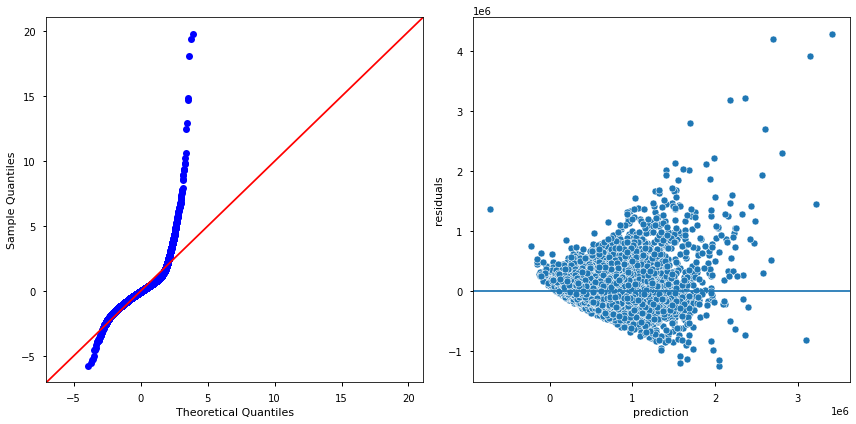

In [31]:
#Functionize model diagnosis of normality and homoskedasticity using qqplots and residuals

def qqplot_and_resids (model, predictors, figsize = (12,6)):
    
    fig, ax = plt.subplots(ncols=2, nrows=1, figsize = figsize)

    sm.graphics.qqplot(model.resid,line='45',fit=True, ax=ax[0]);
    y_hat = model.predict(predictors)
    sns.scatterplot(x=y_hat, y=model.resid, ax=ax[1])
    ax[1].axhline(0)
    ax[1].set(xlabel= 'prediction', ylabel = 'residuals')
    plt.tight_layout()

qqplot_and_resids(model, predictors)

This model failed to meet the normality and homoskedasticity assumptions of linear regression. This is evidenced by the long upper tail of the qqplot and the heteroskedastic grouping of the residuals scatter plot.

In order to better meet those assumptions, I will encode the `zipcode` feature as a categorical variable.

### Feature Engineering

In [33]:
# Encode 'zipcode' as categorical variable

housing_data_model['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

In [34]:
housing_data_model = pd.get_dummies(housing_data_model, columns=['zipcode'], drop_first=True)
housing_data_model

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,sqft_living15,sqft_lot15,was_renovated,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,...,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,"221,900.0",3,1.0,1180,5650,1.0,0.0,0.0,3,7,0,1955,1340,5650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,"538,000.0",3,2.25,2570,7242,2.0,0.0,0.0,3,7,400,1951,1690,7639,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"180,000.0",2,1.0,770,10000,1.0,0.0,0.0,3,6,0,1933,2720,8062,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"604,000.0",4,3.0,1960,5000,1.0,0.0,0.0,5,7,910,1965,1360,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,"510,000.0",3,2.0,1680,8080,1.0,0.0,0.0,3,8,0,1987,1800,7503,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,"360,000.0",3,2.5,1530,1131,3.0,0.0,0.0,3,8,0,2009,1530,1509,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21593,"400,000.0",4,2.5,2310,5813,2.0,0.0,0.0,3,8,0,2014,1830,7200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
21594,"402,101.0",2,0.75,1020,1350,2.0,0.0,0.0,3,7,0,2009,1020,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21595,"400,000.0",3,2.5,1600,2388,2.0,0.0,0.0,3,8,0,2004,1410,1287,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Model 2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     1084.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:36:22   Log-Likelihood:            -2.8963e+05
No. Observations:               21597   AIC:                         5.794e+05
Df Residuals:                   21513   BIC:                         5.801e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9.761e+05   1.26e+05      7.758      0.000    7.29e+05    1.22e+06
bedrooms      -2.724e+04   1547.310    -17.602      0.000   -3.03e+04   -2.42e+04
bathrooms      2.334e+04   2644.191      8.827      0.000    1.82e+04    2.85e+04
sqft_living     205.5149      3.029     67.856      0.000     199.579     211.451
sqft_lot          0.2425      0.039      6.275      0.000       0.167       0.318
floors        -4.179e+04   3154.646    -13.246      0.000    -4.8e+04   -3.56e+04
waterfront     6.868e+05   1.48e+04     46.434      0.000    6.58e+05    7.16e+05
view           5.593e+04   1748.795     31.982      0.000    5.25e+04    5.94e+04
condition      2.458e+04   1931.107     12.728      0.000    2.08e+04    2.84e+04
grade          5.871e+04   1832.461     32.037      0.000    5.51e+04    6.23e+04
sqft_basement   -73.1268      3.612    -20.244      0.000     -80.207     -66.047
yr_built       -760.4935     64.608    -11.771      0.000    -887.131    -633.856
sqft_living15    11.3291      2.905      3.900      0.000       5.636      17.022
sqft_lot15       -0.1493      0.061     -2.455      0.014      -0.268      -0.030
was_renovated  3.621e+04   6424.448      5.636      0.000    2.36e+04    4.88e+04
zipcode_98002  2.736e+04   1.43e+04      1.911      0.056    -707.185    5.54e+04
zipcode_98003 -1.794e+04   1.29e+04     -1.391      0.164   -4.32e+04    7336.081
zipcode_98004  7.735e+05   1.26e+04     61.184      0.000    7.49e+05    7.98e+05
zipcode_98005  2.969e+05   1.53e+04     19.454      0.000    2.67e+05    3.27e+05
zipcode_98006  2.617e+05   1.14e+04     22.917      0.000    2.39e+05    2.84e+05
zipcode_98007  2.407e+05   1.61e+04     14.928      0.000    2.09e+05    2.72e+05
zipcode_98008  2.467e+05   1.29e+04     19.109      0.000    2.21e+05    2.72e+05
zipcode_98010  6.767e+04   1.84e+04      3.684      0.000    3.17e+04    1.04e+05
zipcode_98011  1.201e+05   1.44e+04      8.336      0.000    9.18e+04    1.48e+05
zipcode_98014  1.012e+05   1.71e+04      5.907      0.000    6.76e+04    1.35e+05
zipcode_98019  9.061e+04   1.46e+04      6.219      0.000    6.21e+04    1.19e+05
zipcode_98022 -1.412e+04   1.38e+04     -1.024      0.306   -4.11e+04    1.29e+04
zipcode_98023 -3.492e+04   1.12e+04     -3.120      0.002   -5.69e+04    -1.3e+04
zipcode_98024  1.553e+05   2.02e+04      7.674      0.000    1.16e+05    1.95e+05
zipcode_98027  1.652e+05   1.18e+04     14.050      0.000    1.42e+05    1.88e+05
zipcode_98028  1.172e+05   1.29e+04      9.115      0.000     9.2e+04    1.42e+05
zipcode_98029  2.078e+05   1.25e+04     16.615      0.000    1.83e+05    2.32e+05
zipcode_98030  4505.8971   1.32e+04      0.341      0.733   -2.14e+04    3.04e+04
zipcode_98031   1.22e+04    1.3e+04      0.940      0.347   -1.32e+04    3.76e+04
zipcode_98032  4658.7946   1.68e+04      0.277   

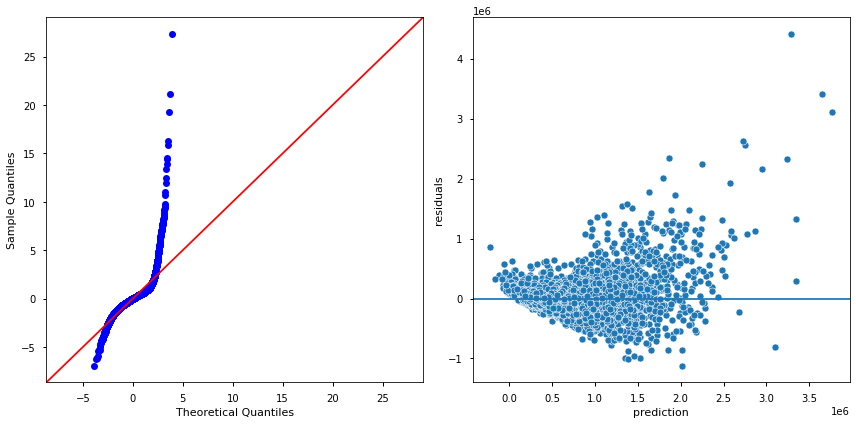

In [35]:
# Create new model

model2 = make_ols_model(housing_data_model, target='price', plot_results=True)

This model failed to meet the normality and homoskedasticity assumptions of linear regression. This is evidenced by the long upper tail of the qqplot and the heteroskedastic grouping of the residuals scatter plot.

In order to better meet those assumptions, I will remove outliers from the data, using a threshold of 1.5 times the difference between the third and first quartiles of the `price` feature.

### Continued scrubbing

In [37]:
# Remove outliers using the IQR method

def find_outliers_IQR(data):
    """Detects outliers using the 1.5*IQR thresholds.
    Returns a boolean Series where True=outlier
    Modified Function based on:https://github.com/flatiron-school/Online-DS-FT-022221-Cohort-Notes/blob/master/py_files/functions_SG.py"""
    res = data.describe()
    q1 = res['25%']
    q3 = res['75%']
    thresh = 1.5*(q3-q1)
    idx_outliers =(data < (q1-thresh)) | (data > (q3+thresh))
    return idx_outliers

In [38]:
# Determine target outliers

price_outliers = find_outliers_IQR(housing_data_model['price'])
price_outliers.sum()

1158

In [39]:
#Create new dataframe without outliers

housing_data_model = housing_data_model[~price_outliers].copy()
housing_data_model

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,sqft_living15,sqft_lot15,was_renovated,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,...,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,"221,900.0",3,1.0,1180,5650,1.0,0.0,0.0,3,7,0,1955,1340,5650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,"538,000.0",3,2.25,2570,7242,2.0,0.0,0.0,3,7,400,1951,1690,7639,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"180,000.0",2,1.0,770,10000,1.0,0.0,0.0,3,6,0,1933,2720,8062,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"604,000.0",4,3.0,1960,5000,1.0,0.0,0.0,5,7,910,1965,1360,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,"510,000.0",3,2.0,1680,8080,1.0,0.0,0.0,3,8,0,1987,1800,7503,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,"360,000.0",3,2.5,1530,1131,3.0,0.0,0.0,3,8,0,2009,1530,1509,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21593,"400,000.0",4,2.5,2310,5813,2.0,0.0,0.0,3,8,0,2014,1830,7200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
21594,"402,101.0",2,0.75,1020,1350,2.0,0.0,0.0,3,7,0,2009,1020,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21595,"400,000.0",3,2.5,1600,2388,2.0,0.0,0.0,3,8,0,2004,1410,1287,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Model 3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     1218.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:36:23   Log-Likelihood:            -2.6101e+05
No. Observations:               20439   AIC:                         5.222e+05
Df Residuals:                   20355   BIC:                         5.229e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.695e+05   6.93e+04      8.217      0.000    4.34e+05    7.05e+05
bedrooms      -3982.7597    857.659     -4.644      0.000   -5663.841   -2301.678
bathrooms      1.318e+04   1472.855      8.951      0.000    1.03e+04    1.61e+04
sqft_living     109.7148      1.827     60.060      0.000     106.134     113.295
sqft_lot          0.2851      0.021     13.337      0.000       0.243       0.327
floors        -1.467e+04   1746.577     -8.402      0.000   -1.81e+04   -1.13e+04
waterfront     1.636e+05   1.28e+04     12.748      0.000    1.38e+05    1.89e+05
view            3.08e+04   1054.106     29.217      0.000    2.87e+04    3.29e+04
condition      2.372e+04   1051.666     22.555      0.000    2.17e+04    2.58e+04
grade          4.365e+04   1023.855     42.628      0.000    4.16e+04    4.57e+04
sqft_basement   -43.3170      2.094    -20.685      0.000     -47.422     -39.212
yr_built       -481.3565     35.697    -13.485      0.000    -551.325    -411.388
sqft_living15    36.6430      1.710     21.429      0.000      33.291      39.995
sqft_lot15       -0.0055      0.034     -0.163      0.871      -0.071       0.060
was_renovated  3.601e+04   3664.005      9.827      0.000    2.88e+04    4.32e+04
zipcode_98002  8101.4274   7552.617      1.073      0.283   -6702.310    2.29e+04
zipcode_98003 -6328.8389   6799.106     -0.931      0.352   -1.97e+04    6997.956
zipcode_98004  5.048e+05   8273.625     61.011      0.000    4.89e+05    5.21e+05
zipcode_98005  3.226e+05   8327.642     38.744      0.000    3.06e+05    3.39e+05
zipcode_98006  2.666e+05   6275.315     42.482      0.000    2.54e+05    2.79e+05
zipcode_98007  2.522e+05   8590.952     29.356      0.000    2.35e+05    2.69e+05
zipcode_98008  2.383e+05   6926.320     34.399      0.000    2.25e+05    2.52e+05
zipcode_98010  8.359e+04   9691.431      8.625      0.000    6.46e+04    1.03e+05
zipcode_98011  1.429e+05   7598.803     18.812      0.000    1.28e+05    1.58e+05
zipcode_98014  1.082e+05   9096.689     11.890      0.000    9.03e+04    1.26e+05
zipcode_98019  9.973e+04   7687.236     12.973      0.000    8.47e+04    1.15e+05
zipcode_98022 -3944.1710   7281.199     -0.542      0.588   -1.82e+04    1.03e+04
zipcode_98023 -2.281e+04   5906.673     -3.861      0.000   -3.44e+04   -1.12e+04
zipcode_98024  1.489e+05   1.11e+04     13.477      0.000    1.27e+05    1.71e+05
zipcode_98027  1.879e+05   6268.734     29.977      0.000    1.76e+05       2e+05
zipcode_98028  1.326e+05   6795.270     19.509      0.000    1.19e+05    1.46e+05
zipcode_98029  2.279e+05   6644.671     34.302      0.000    2.15e+05    2.41e+05
zipcode_98030  4988.7317   6968.886      0.716      0.474   -8670.846    1.86e+04
zipcode_98031      1e+04   6844.407      1.461      0.144   -3412.903    2.34e+04
zipcode_98032 -5779.8522   8864.204     -0.652   

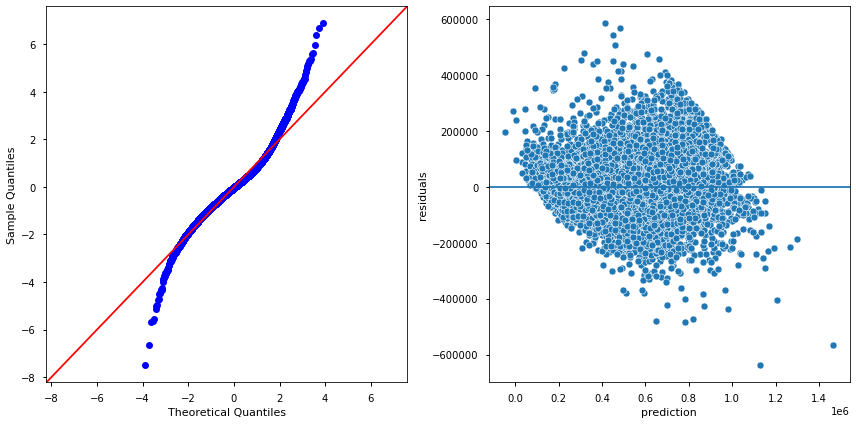

In [40]:
# Create new model

model3 = make_ols_model(housing_data_model, target='price', plot_results=True)

This model failed to meet the normality and homoskedasticity assumptions of linear regression. This is evidenced by the long upper tail of the qqplot and the heteroskedastic grouping of the residuals scatter plot.

In order to better meet those assumptions, I will remove further outliers from the data, using a threshold of 1.5 times the difference between the third and first quartiles of the `price` feature.

### Continued scrubbing

In [42]:
# Remove further outliers

price_outliers2 = find_outliers_IQR(housing_data_model['price'])
price_outliers2.sum()

259

In [43]:
#Create new dataframe without outliers

housing_data_model = housing_data_model[~price_outliers2].copy()
housing_data_model

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,sqft_living15,sqft_lot15,was_renovated,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,...,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,"221,900.0",3,1.0,1180,5650,1.0,0.0,0.0,3,7,0,1955,1340,5650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,"538,000.0",3,2.25,2570,7242,2.0,0.0,0.0,3,7,400,1951,1690,7639,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"180,000.0",2,1.0,770,10000,1.0,0.0,0.0,3,6,0,1933,2720,8062,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"604,000.0",4,3.0,1960,5000,1.0,0.0,0.0,5,7,910,1965,1360,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,"510,000.0",3,2.0,1680,8080,1.0,0.0,0.0,3,8,0,1987,1800,7503,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,"360,000.0",3,2.5,1530,1131,3.0,0.0,0.0,3,8,0,2009,1530,1509,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21593,"400,000.0",4,2.5,2310,5813,2.0,0.0,0.0,3,8,0,2014,1830,7200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
21594,"402,101.0",2,0.75,1020,1350,2.0,0.0,0.0,3,7,0,2009,1020,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21595,"400,000.0",3,2.5,1600,2388,2.0,0.0,0.0,3,8,0,2004,1410,1287,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Model 4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     1188.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:36:24   Log-Likelihood:            -2.5681e+05
No. Observations:               20180   AIC:                         5.138e+05
Df Residuals:                   20096   BIC:                         5.145e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.808e+05   6.69e+04      8.680      0.000     4.5e+05    7.12e+05
bedrooms      -3057.5642    827.621     -3.694      0.000   -4679.769   -1435.360
bathrooms      1.295e+04   1426.453      9.076      0.000    1.02e+04    1.57e+04
sqft_living     106.0702      1.778     59.662      0.000     102.585     109.555
sqft_lot          0.2875      0.020     14.035      0.000       0.247       0.328
floors        -1.456e+04   1684.946     -8.642      0.000   -1.79e+04   -1.13e+04
waterfront     1.705e+05   1.24e+04     13.728      0.000    1.46e+05    1.95e+05
view           2.779e+04   1040.223     26.714      0.000    2.57e+04    2.98e+04
condition      2.282e+04   1013.391     22.523      0.000    2.08e+04    2.48e+04
grade          4.207e+04    993.020     42.367      0.000    4.01e+04     4.4e+04
sqft_basement   -43.6572      2.034    -21.460      0.000     -47.645     -39.670
yr_built       -476.9743     34.484    -13.832      0.000    -544.566    -409.383
sqft_living15    36.0421      1.660     21.713      0.000      32.788      39.296
sqft_lot15        0.0022      0.032      0.069      0.945      -0.061       0.065
was_renovated   3.22e+04   3560.060      9.044      0.000    2.52e+04    3.92e+04
zipcode_98002  6211.3590   7227.145      0.859      0.390   -7954.439    2.04e+04
zipcode_98003 -5320.6966   6505.771     -0.818      0.413   -1.81e+04    7431.148
zipcode_98004  4.881e+05   8204.234     59.492      0.000    4.72e+05    5.04e+05
zipcode_98005  3.244e+05   8041.346     40.337      0.000    3.09e+05     3.4e+05
zipcode_98006  2.634e+05   6068.809     43.405      0.000    2.52e+05    2.75e+05
zipcode_98007  2.492e+05   8285.623     30.075      0.000    2.33e+05    2.65e+05
zipcode_98008  2.382e+05   6641.464     35.866      0.000    2.25e+05    2.51e+05
zipcode_98010  8.495e+04   9274.060      9.160      0.000    6.68e+04    1.03e+05
zipcode_98011  1.431e+05   7283.260     19.654      0.000    1.29e+05    1.57e+05
zipcode_98014  1.084e+05   8706.179     12.456      0.000    9.14e+04    1.26e+05
zipcode_98019  1.005e+05   7356.107     13.666      0.000    8.61e+04    1.15e+05
zipcode_98022 -2483.1123   6969.387     -0.356      0.722   -1.61e+04    1.12e+04
zipcode_98023 -2.191e+04   5651.904     -3.876      0.000    -3.3e+04   -1.08e+04
zipcode_98024  1.468e+05   1.06e+04     13.814      0.000    1.26e+05    1.68e+05
zipcode_98027  1.899e+05   6012.688     31.583      0.000    1.78e+05    2.02e+05
zipcode_98028  1.332e+05   6508.486     20.462      0.000     1.2e+05    1.46e+05
zipcode_98029  2.277e+05   6385.202     35.660      0.000    2.15e+05     2.4e+05
zipcode_98030  5091.3698   6667.991      0.764      0.445   -7978.440    1.82e+04
zipcode_98031   1.01e+04   6548.970      1.542      0.123   -2736.228    2.29e+04
zipcode_98032 -6389.9596   8481.742     -0.753   

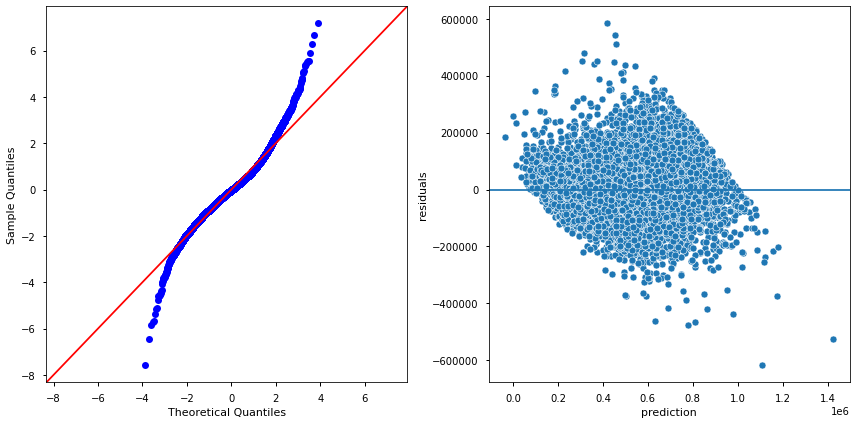

In [44]:
# Create new model using new dataframe

model4 = make_ols_model(housing_data_model, target='price', plot_results=True)

This model failed to meet the normality and homoskedasticity assumptions of linear regression. This is evidenced by the long upper tail of the qqplot and the heteroskedastic grouping of the residuals scatter plot.

In order to better meet those assumptions, I will remove any predictors with in significant p-values.

### Continued scrubbing

In [45]:
# Drop features with insignificant p-values (<0.05)

housing_data_model_significant= housing_data_model.drop('sqft_lot15', axis=1)
housing_data_model_significant.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,sqft_living15,was_renovated,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,...,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,"221,900.0",3,1.0,1180,5650,1.0,0.0,0.0,3,7,0,1955,1340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,"538,000.0",3,2.25,2570,7242,2.0,0.0,0.0,3,7,400,1951,1690,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"180,000.0",2,1.0,770,10000,1.0,0.0,0.0,3,6,0,1933,2720,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"604,000.0",4,3.0,1960,5000,1.0,0.0,0.0,5,7,910,1965,1360,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,"510,000.0",3,2.0,1680,8080,1.0,0.0,0.0,3,8,0,1987,1800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Model 5

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     1203.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:36:24   Log-Likelihood:            -2.5681e+05
No. Observations:               20180   AIC:                         5.138e+05
Df Residuals:                   20097   BIC:                         5.144e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.808e+05   6.69e+04      8.681      0.000     4.5e+05    7.12e+05
bedrooms      -3059.5395    827.104     -3.699      0.000   -4680.731   -1438.348
bathrooms      1.294e+04   1425.906      9.078      0.000    1.01e+04    1.57e+04
sqft_living     106.0749      1.776     59.711      0.000     102.593     109.557
sqft_lot          0.2884      0.016     18.301      0.000       0.258       0.319
floors        -1.456e+04   1684.396     -8.646      0.000   -1.79e+04   -1.13e+04
waterfront     1.705e+05   1.24e+04     13.728      0.000    1.46e+05    1.95e+05
view           2.779e+04   1040.179     26.715      0.000    2.57e+04    2.98e+04
condition      2.283e+04   1013.299     22.526      0.000    2.08e+04    2.48e+04
grade          4.207e+04    992.985     42.368      0.000    4.01e+04     4.4e+04
sqft_basement   -43.6570      2.034    -21.460      0.000     -47.644     -39.670
yr_built       -476.9787     34.483    -13.832      0.000    -544.569    -409.389
sqft_living15    36.0481      1.658     21.747      0.000      32.799      39.297
was_renovated   3.22e+04   3559.886      9.045      0.000    2.52e+04    3.92e+04
zipcode_98002  6212.0386   7226.960      0.860      0.390   -7953.395    2.04e+04
zipcode_98003 -5320.7748   6505.610     -0.818      0.413   -1.81e+04    7430.754
zipcode_98004  4.881e+05   8203.997     59.493      0.000    4.72e+05    5.04e+05
zipcode_98005  3.244e+05   8040.828     40.340      0.000    3.09e+05     3.4e+05
zipcode_98006  2.634e+05   6068.478     43.407      0.000    2.52e+05    2.75e+05
zipcode_98007  2.492e+05   8285.373     30.076      0.000    2.33e+05    2.65e+05
zipcode_98008  2.382e+05   6641.260     35.867      0.000    2.25e+05    2.51e+05
zipcode_98010  8.499e+04   9253.581      9.185      0.000    6.69e+04    1.03e+05
zipcode_98011  1.431e+05   7282.941     19.654      0.000    1.29e+05    1.57e+05
zipcode_98014  1.085e+05   8657.988     12.532      0.000    9.15e+04    1.25e+05
zipcode_98019  1.006e+05   7339.625     13.701      0.000    8.62e+04    1.15e+05
zipcode_98022 -2448.4233   6951.030     -0.352      0.725   -1.61e+04    1.12e+04
zipcode_98023 -2.191e+04   5651.757     -3.877      0.000    -3.3e+04   -1.08e+04
zipcode_98024  1.469e+05   1.06e+04     13.879      0.000    1.26e+05    1.68e+05
zipcode_98027  1.899e+05   6005.680     31.624      0.000    1.78e+05    2.02e+05
zipcode_98028  1.332e+05   6508.268     20.463      0.000     1.2e+05    1.46e+05
zipcode_98029  2.277e+05   6384.914     35.661      0.000    2.15e+05     2.4e+05
zipcode_98030  5088.5176   6667.698      0.763      0.445   -7980.717    1.82e+04
zipcode_98031   1.01e+04   6548.607      1.542      0.123   -2739.049    2.29e+04
zipcode_98032 -6390.1636   8481.531     -0.753      0.451    -2.3e+04    1.02e+04
zipcode_98033    3.1e+05   6148.771     50.412   

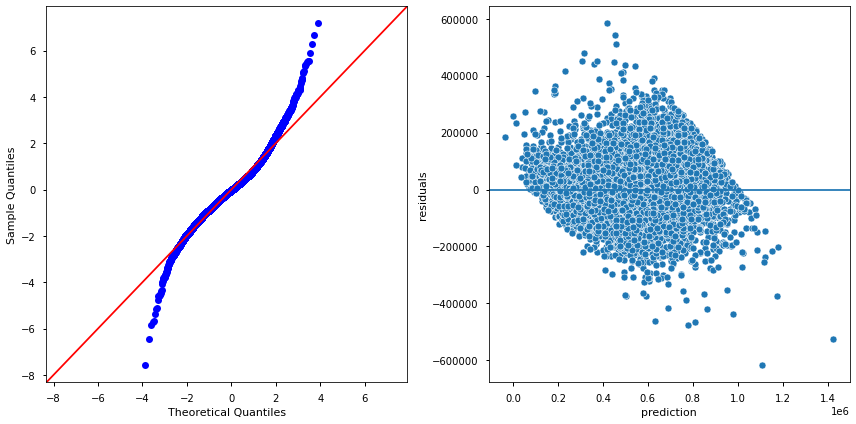

In [46]:
model5 = make_ols_model(housing_data_model_significant, target='price', plot_results=True)

The current model, while it does not perfectly meet all the assumptions for linear regression,
meets them to a degree with which I am comfortable. The tails of the qqplot are much less pronounced and the distribution of the residuals are much more homoskedastic than the first baseline model.

# iNTERPRET

Based on the adjusted R squared value of 0.830 and the large F statistic, I can conclude that the correlation between the model and dependent variable is statistically significant, and can be used as a tool to help predict housing prices, and more importantly, identify home characteristics that affect home sale price. The final model is also notably better than the baseline model, with a higher R squared and more adherence to the normality and homoskedasticity assumptions. However, the final model is by no means perfect; there are still multicollinearity concerns, and the assumptions of linear regression could be better met.

While the model is not perfect, I believe it could be generalized beyond the current data effectively with data from similar counties to King County, and that it would benefit any homeowner in similar areas.

In [49]:
#Display coefficients for each feature

pd.set_option('display.max_rows', None)
coeffs = model5.params.sort_values().to_frame('Coefficients')
coeffs['Absolute Value'] = coeffs['Coefficients'].abs()
coeffs.sort_values('Absolute Value',ascending=False,inplace=True)
coeffs.round(2)


,Coefficients,Absolute Value
zipcode_98039,"633,288.7","633,288.7"
const,"580,767.46","580,767.46"
zipcode_98004,"488,083.09","488,083.09"
zipcode_98112,"403,713.06","403,713.06"
zipcode_98040,"400,097.93","400,097.93"
zipcode_98109,"396,186.57","396,186.57"
zipcode_98119,"392,875.33","392,875.33"
zipcode_98102,"389,594.72","389,594.72"
zipcode_98105,"364,668.56","364,668.56"
zipcode_98199,"344,484.61","344,484.61"


The coefficents above describe the impact each feature has on home sale price. Notably, the three features with the largest positive coefficents, that the homeowner can control, are `was_renovated`, `grade`, and `condition`. 

### Feature Visualizations

#### `was_renovated`

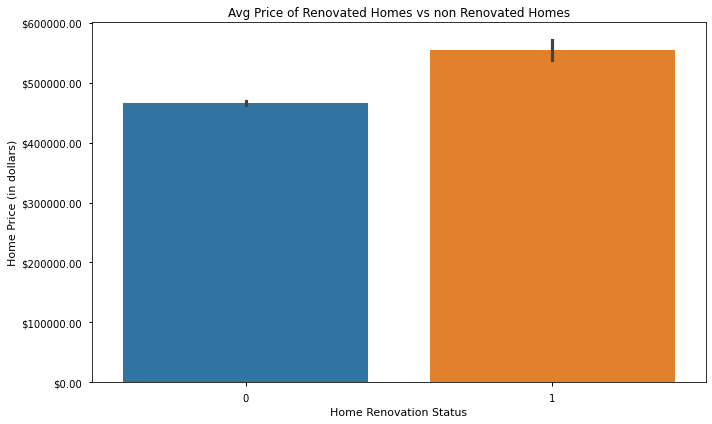

In [55]:
# Create plot

fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(ax=ax, 
            x='was_renovated', 
            y='price', 
            data=housing_data_model_significant)
ax.set_xlabel('Home Renovation Status')
ax.set_ylabel('Home Price (in dollars)')
ax.set_title('Avg Price of Renovated Homes vs non Renovated Homes')
ax.yaxis.set_major_formatter('${x:1.2f}')

plt.tight_layout()

plt.savefig('images/price_by_renovation.png', dpi=150)

plt.show()

As evidenced by a coefficient of 32,199.82, simply the fact that a home was renovated at all, in any capacity, could result in an increase in home price of over $30,000.
The figure above shows the difference in the average price of a non renovated home versus a renovated home.

#### `grade`

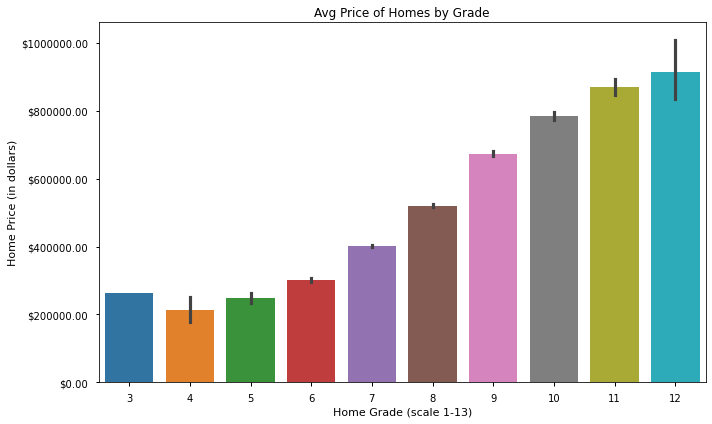

In [60]:
# Create plot

fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(ax=ax, 
            x='grade', 
            y='price', 
            data=housing_data_model_significant)
ax.set_xlabel('Home Grade (scale 1-13)')
ax.set_ylabel('Home Price (in dollars)')
ax.set_title('Avg Price of Homes by Grade')
ax.yaxis.set_major_formatter('${x:1.2f}')

plt.tight_layout()

plt.savefig('images/price_by_grade.png', dpi=150)

plt.show()

With a positive coefficient of 42,070.53, increasing the grade of a home (which is an overall grade given to the housing unit based on King County grading system from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.) by one level on a scale from 1-13 could result in an increase in home price of over $40,000.

#### `condition`

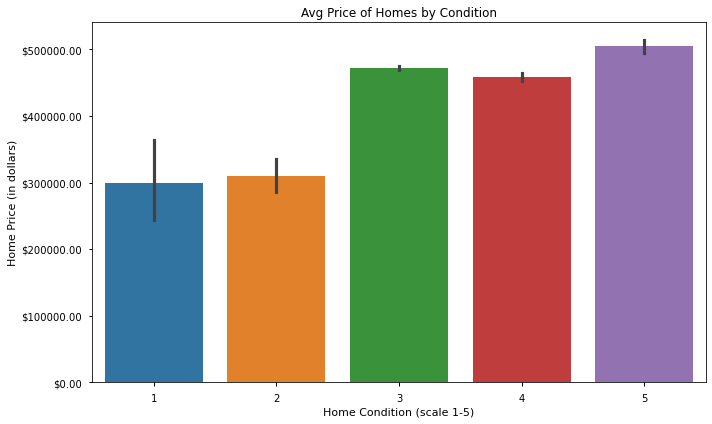

In [59]:
# Create plot

fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(ax=ax, 
            x='condition', 
            y='price', 
            data=housing_data_model_significant)
ax.set_xlabel('Home Condition (scale 1-5)')
ax.set_ylabel('Home Price (in dollars)')
ax.set_title('Avg Price of Homes by Condition')
ax.yaxis.set_major_formatter('${x:1.2f}')

plt.tight_layout()

plt.savefig('images/price_by_condition.png', dpi=150)

plt.show()

With a positive coefficient of 22,825.45, increasing the condition of a home (which is an index from 1 to 5 based on the overall condition of the home) by one level on a scale from 1-5, could result in an increase in home price of over $20,000.

# CONCLUSIONS & RECOMMENDATIONS

Based on this multiple linear regression analysis, I would provides three recommendations for King County home owners looking to renovate and sell their homes, with the goal of maximizing their home sale price:

- **Any renovation is better than none.** As evidenced by a positive coefficient of 32,199.82, simply the fact that a home was renovated at all, in any capacity, could result in an increase in home price of over $30,000. Based on those results, I would recommend that homeowners conduct some kind of renovation, no matter how small.

- **Grade is king.** With a positive coefficient of 42,070.53, increasing the grade of a home by one level on a scale from 1-13 could result in an increase in home price of over $40,000. Grade is defined by King County as an overall grade given to the housing unit based on King County grading system from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design. If a homeowner can improve the grade level of their home, whether by improving the construction or design of the home, it could pay large dividends.

- **Condition is last, but not least.** Represented by a positive coefficient of 22,825.45, increasing the condition of a home by one level on a scale from 1-5, could result in an increase in home price of over $20,000. Condition is defined by King County as an index from 1 to 5 based on the overall condition of the home. Homeowners should focus on improving the condition of the home, potentially by replacing appliances or other run down features of the home.

However, my model and analysis are not complete solutions, nor are they perfect. The final model still struggles with multicollinearity issues, as all multiple linear regression models do, and does not perfectly meet the assumptions of normality and homoskedasticity. But I believe that the model is accurate to a degree that makes it useful for homeowners in renovation decision making, and is easily interpretable.

I could improve this analysis in the future by further transforming and scrubbing the data to better meet the assumptions of linear regression, and by acquiring more data on other features related to housing that could help better predict home prices.